<a href="https://colab.research.google.com/github/turtler12/CV_Homework/blob/main/pset2_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
from numpy.fft import fft2, ifft2, fftshift, ifftshift
from numpy import angle, real
from numpy import exp, abs, pi, sqrt
import matplotlib.pyplot as plt
import cv2
import scipy.ndimage as ndimage

def imshow(im, cmap='gray'):
    # clip image from 0-1
    im = np.clip(im, 0, 1)
    plt.imshow(im, cmap=cmap)


In [2]:
! curl http://6.869.csail.mit.edu/sp21/pset3_data/einsteinandwho.jpg > einsteinandwho.jpg
! curl http://6.869.csail.mit.edu/sp21/pset3_data/bill.avi > bill.avi

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  182k  100  182k    0     0   396k      0 --:--:-- --:--:-- --:--:--  397k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  678k  100  678k    0     0  1759k      0 --:--:-- --:--:-- --:--:-- 1761k


## Problem 1


In [20]:
# Function to apply Gaussian blur
def apply_gaussian_blur(img, k_size, sigma):
    """Applies Gaussian blur to an image using a manually created kernel."""
    # using np.exp for arrays
    gaussian_kernel = lambda x, y: (1 / (2 * np.pi * sigma ** 2)) * np.exp(
        (-1 * ((x - (k_size - 1) / 2) ** 2 + (y - (k_size - 1) / 2) ** 2)) / (2 * sigma ** 2)
    )

    kernel_matrix = np.fromfunction(gaussian_kernel, (k_size, k_size))
    normalized_kernel = kernel_matrix / np.sum(kernel_matrix)

    blurred_img = np.zeros_like(img, dtype=np.float32)
    for channel in range(3):
        blurred_img[:, :, channel] = convolve2d(img[:, :, channel], normalized_kernel, mode='same', boundary='symm')

    return np.clip(blurred_img, 0, 255).astype(np.uint8)


# Function to create the hybrid image
def create_hybrid_image(img_high_freq, img_low_freq, k_size, sigma):
    """Combines a high-frequency and low-frequency image to create a hybrid effect."""
    low_freq_part = apply_gaussian_blur(img_low_freq, k_size, sigma)
    high_freq_part = img_high_freq - apply_gaussian_blur(img_high_freq, k_size, sigma)
    hybrid_img = low_freq_part + high_freq_part
    return np.clip(hybrid_img, 0, 255).astype(np.uint8)

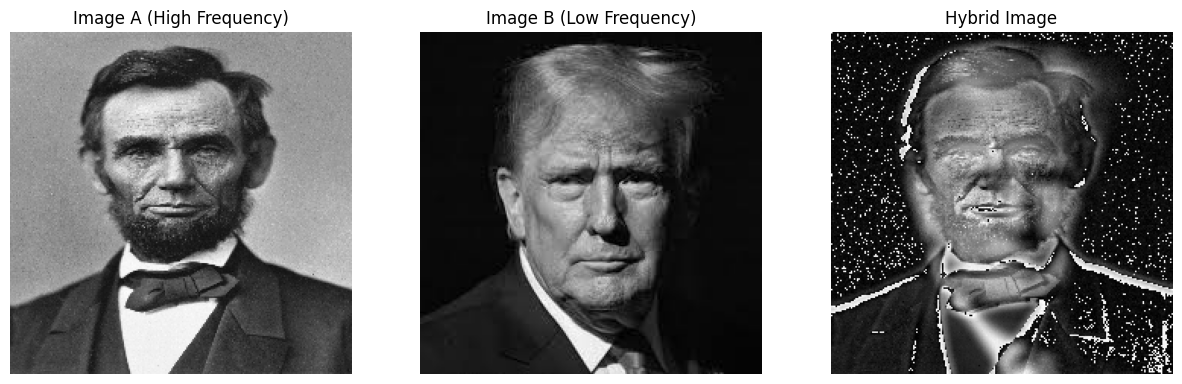

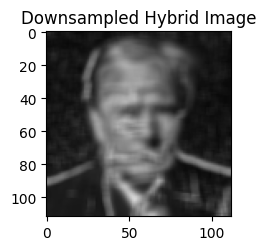

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
import math

# Load images
img1 = cv2.imread('/content/abe.jpg')
img2 = cv2.imread('/content/donaldtrump.jpg')

# Ensure both images have the same dimensions
height, width = img2.shape[:2]
img1 = cv2.resize(img1, (width, height))

# Define parameters
sigma_value = 20
kernel_size = 10

# Generate the hybrid image
hybrid_image = create_hybrid_image(img1, img2, kernel_size, sigma_value)

# Apply Gaussian blur and downsample
downsample_factor = 2
blurred_hybrid = apply_gaussian_blur(hybrid_image, kernel_size, sigma_value)
downsampled_hybrid = cv2.resize(
    blurred_hybrid,
    (blurred_hybrid.shape[1] // downsample_factor, blurred_hybrid.shape[0] // downsample_factor)
)

# Display results
image_list = [img1, img2, hybrid_image]
titles = ['Image A (High Frequency)', 'Image B (Low Frequency)', 'Hybrid Image']

plt.figure(figsize=(15, 5))
for idx, (image, label) in enumerate(zip(image_list, titles)):
    plt.subplot(1, len(image_list), idx + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(label)
    plt.axis('off')
plt.show()

plt.imshow(cv2.cvtColor(downsampled_hybrid, cv2.COLOR_BGR2RGB))
plt.title("Downsampled Hybrid Image")
fig = plt.gcf()
fig.set_size_inches(fig.get_size_inches() / downsample_factor)
plt.show()


## Problem 2


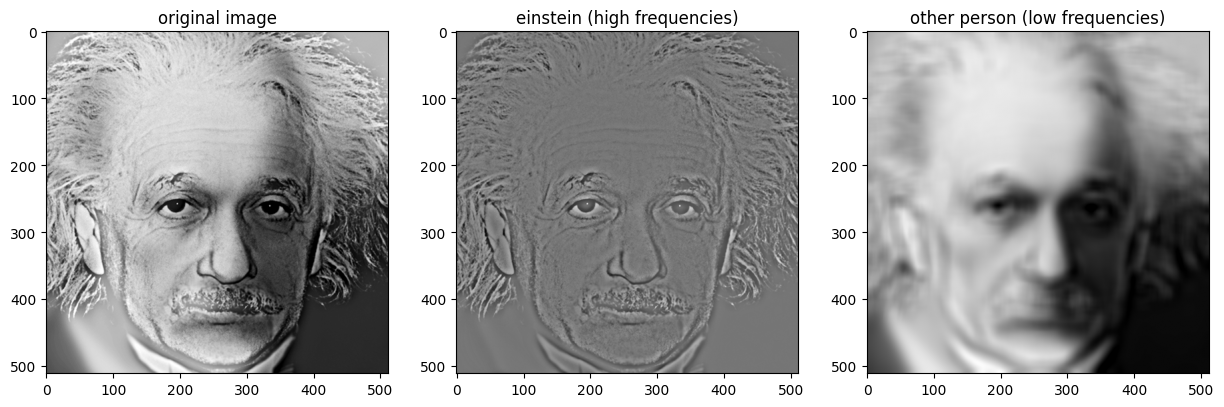

In [66]:
### enter your code below

import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# making sure its grey/correct dimensions
image = cv2.imread('/content/einsteinandwho.jpg', cv2.IMREAD_GRAYSCALE)

# gaussian blur function
def apply_gaussian_blur(img, kernel_size, sigma):
    # apply gaussian blur to extract low-frequency components
    kernel = cv2.getGaussianKernel(kernel_size, sigma)
    gaussian_kernel = np.outer(kernel, kernel)
    blurred = convolve2d(img, gaussian_kernel, mode='same', boundary='symm')
    return blurred

# scale image intensity to [0,1] with mean of 0.5
def intensityscale(raw_img):
    v_min, v_max = raw_img.min(), raw_img.max()
    scaled_im = (raw_img - v_min) / (v_max - v_min)
    meangray = np.mean(scaled_im)
    scaled_im = scaled_im - meangray + 0.5
    return np.clip(scaled_im, 0, 1)

# filtering parameters
kernel_size = 21
sigma = 10

# extract low and high frequency components
low_freq_image = apply_gaussian_blur(image, kernel_size, sigma)
high_freq_image = image - low_freq_image

# scale for better visualization
low_freq_scaled = intensityscale(low_freq_image)
high_freq_scaled = intensityscale(high_freq_image)

# display results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("original image")

axes[1].imshow(high_freq_scaled, cmap='gray')
axes[1].set_title("einstein (high frequencies)")


axes[2].imshow(low_freq_scaled, cmap='gray')
axes[2].set_title("other person (low frequencies)")


plt.show()


In [ ]:
# scale image's intensity to [0,1] with mean value of 0.5 for better visualization.
def intensityscale(raw_img):

    # scale an image's intensity from [min, max] to [0, 1].
    v_min, v_max = raw_img.min(), raw_img.max()
    scaled_im = (raw_img * 1.0 - v_min) / (v_max - v_min)

    # keep the mean to be 0.5.
    meangray = np.mean(scaled_im)
    scaled_im = scaled_im - meangray + 0.5

    # clip to [0, 1]
    scaled_im = np.clip(scaled_im, 0, 1)

    return scaled_im

## Problem 3.a

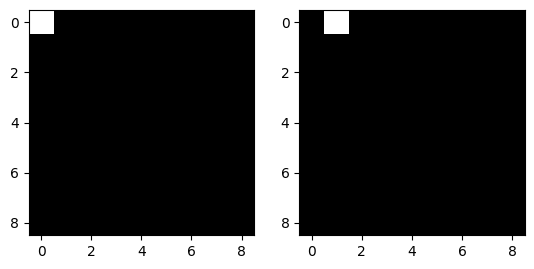

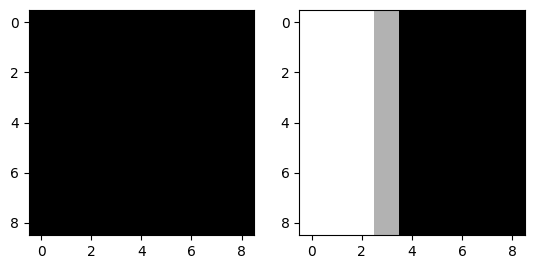

In [36]:
# 9x9 images
imSize = 9

# we would like to magnify the change between im1 and im2 by 4x
magnificationFactor = 4;

# horizontal movement from (0, 0) to (0, 1)
im1 = np.zeros([imSize, imSize])
im2 = np.zeros([imSize, imSize])
im1[0,0] = 1
im2[0,1] = 1

ff1 = fftshift(fft2(im1))
ff2 = fftshift(fft2(im2))

plt.figure()
plt.subplot(121)
imshow(im1)
plt.subplot(122)
imshow(im2)

plt.figure()
plt.subplot(121)
imshow(angle(ff1))
plt.subplot(122)
imshow(angle(ff2))

### Magnify Change


In [39]:
def magnifyChange(im1, im2, magnificationFactor):

    # find phase shift in frequency domain
    im1Dft = fft2(im1)
    im2Dft = fft2(im2)
    phaseShift = np.angle(im2Dft) - np.angle(im1Dft) # subtract the angles to get the phase shift

    # magnify the phase change in frequency domain
    # basically constant * e^phase difference
    magnifiedDft = np.abs(im2Dft) * np.exp(1j * phaseShift * magnificationFactor+np.angle(im1Dft))

    # what does the magnified phase change cause in image space?
    magnified = ifft2(magnifiedDft).real;

    return magnified

**HINT:** If you're not familiar with complex number in python, here's a quickstart.

In [40]:
# create a complex number
x = 1 + 1j
print("x =", x)
print("x.real", x.real, "x.imag", x.imag)

# magnitude and phase of complex number
mag = abs(x)
phase = angle(x)

print("Magnitude", mag)
print("Phase", phase)

# Euler's formula
y = mag * exp(phase * 1j)
print("y =", y)

x = (1+1j)
x.real 1.0 x.imag 1.0
Magnitude 1.4142135623730951
Phase 0.7853981633974483
y = (1.0000000000000002+1j)


TypeError: FigureCanvasAgg.print_png() got an unexpected keyword argument 'bbox'

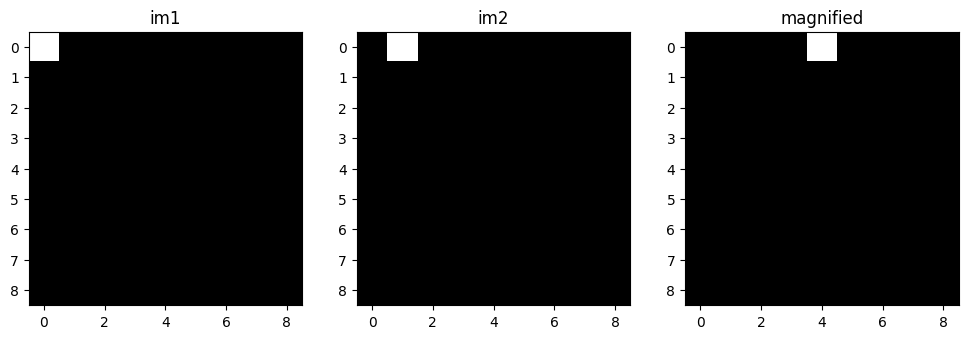

In [41]:
# magnify position change
magnified = magnifyChange(im1, im2, magnificationFactor);

plt.figure(figsize=(12,36))
plt.subplot(131)
imshow(im1); plt.title('im1');

plt.subplot(132)
imshow(im2); plt.title('im2');

plt.subplot(133)
imshow(magnified); plt.title('magnified');
plt.savefig("problem_3a.png", bbox="tight")

## Problem 3.b

TypeError: FigureCanvasAgg.print_png() got an unexpected keyword argument 'bbox'

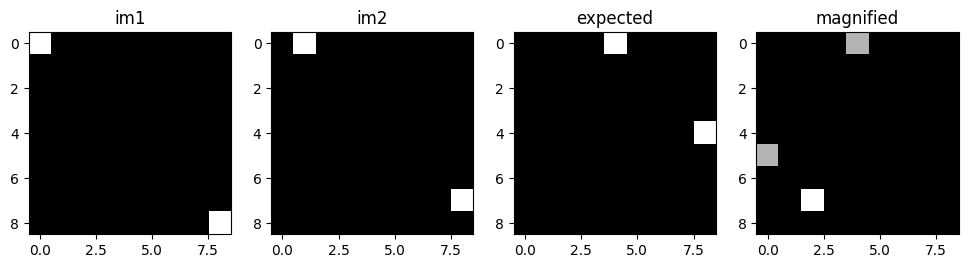

In [42]:
# 9x9 images
imSize = 9

# we would like to magnify the change between im1 and im2 by 4x
magnificationFactor = 4

# horizontal movement from (1, 1) to (1, 2)
# additional vertical movement from (9, 9) to (8, 9)
im1 = np.zeros([imSize, imSize])
im2 = np.zeros([imSize, imSize])
im1[0,0] = 1
im2[0,1] = 1
im1[8,8] = 1
im2[7,8] = 1


### TODO: ENTER YOUR CODE BELOW
### manually edit the expected matrix (currently set as zeros) by creating 1s to show the expected output
expected = np.zeros([imSize, imSize])
# horizontal shift + 4*magnification would go from 00 to 04
expected[0,4] = 1
expected[4,8] = 1 # vertical shift



# magnify position change
magnified = magnifyChange(im1, im2, magnificationFactor)


plt.figure(figsize=(12,36))
plt.subplot(141)
imshow(im1); plt.title('im1');

plt.subplot(142)
imshow(im2); plt.title('im2');

plt.subplot(143)
imshow(expected); plt.title('expected');

plt.subplot(144)
imshow(magnified); plt.title('magnified');
plt.savefig("problem_3b.png", bbox="tight")

## Problem 3.c

TypeError: FigureCanvasAgg.print_png() got an unexpected keyword argument 'bbox'

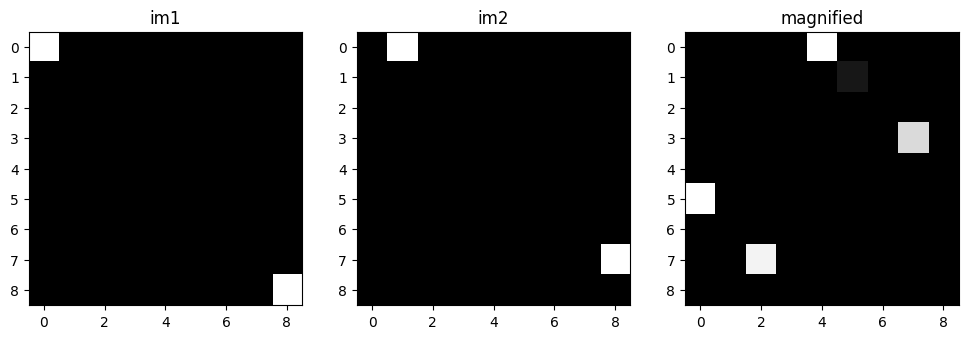

In [44]:
# 9x9 images
imSize = 9

# we would like to magnify the change between im1 and im2 by 4x
magnificationFactor = 4

# width of our Gaussian window
sigma = 2

# horizontal movement from (1, 1) to (1, 2)
# additional vertical movement from (9, 9) to (8, 9)
im1 = np.zeros([imSize, imSize])
im2 = np.zeros([imSize, imSize])
im1[0,0] = 1
im2[0,1] = 1
im1[8,8] = 1
im2[7,8] = 1

# we will magnify windows of the image and aggregate the results
magnified = np.zeros([imSize, imSize])

# meshgrid for computing Gaussian window
X, Y = np.meshgrid(np.arange(imSize), np.arange(imSize))

for y in range(0, imSize, 2*sigma):
    for x in range(0, imSize, 2*sigma):
        gaussianMask = np.exp(-((X-x)**2+(Y-y)**2)/(2*sigma**2))
        windowMagnified = magnifyChange(im1*gaussianMask, im2*gaussianMask,magnificationFactor)
        magnified = magnified + windowMagnified

plt.figure(figsize=(12,36))
plt.subplot(131)
imshow(im1); plt.title('im1');

plt.subplot(132)
imshow(im2); plt.title('im2');

plt.subplot(133)
imshow(magnified); plt.title('magnified');
plt.savefig("problem_3c.png", bbox="tight")

## Problem 3.d

In [45]:
import numpy as np
import cv2

cap = cv2.VideoCapture('bill.avi')

# list of video frames
frames = []

while(cap.isOpened()):
    # read frame from the video
    ret, frame = cap.read()

    if ret is False:
        break

    frames.append(frame)

cap.release()

# scale frame to 0-1
frames = np.array(frames) / 255.
print("frames size:", frames.shape, "# (nb_frames, height, width, channel)")

# get height, width
numFrames = frames.shape[0]
height = frames.shape[1]
width = frames.shape[2]

frames size: (60, 240, 240, 3) # (nb_frames, height, width, channel)


### Motion magnification
Fill out code **here**

In [67]:
# 10x magnification of motion
magnificationFactor = 10

# width of Gaussian window
sigma = 13

# alpha for moving average
alpha = 0.5

# we will magnify windows of the video and aggregate the results
magnified = np.zeros_like(frames)

# meshgrid for computing Gaussian window
X, Y = np.meshgrid(np.arange(width), np.arange(height))

# iterate over windows of the frames
xRange = list(range(0, width, 2*sigma))
yRange = list(range(0, height, 2*sigma))
numWindows = len(xRange) * len(yRange)
windowIndex = 1

for y in yRange:
    for x in xRange:
        for channelIndex in range(3): # RGB channels
            for frameIndex in range(numFrames):

                # create windowed frames
                gaussianMask = np.exp(-((X-x)**2+(Y-y)**2)/(2*sigma**2)) # same as before
                windowedFrames = gaussianMask * frames[frameIndex,:,:,channelIndex]

                # initialize moving average of phase for current window/channel
                if frameIndex == 0:
                    windowAveragePhase = angle(fft2(windowedFrames))

                windowDft = fft2(windowedFrames)

                # compute phase shift and constrain to [-pi, pi] since
                # angle space wraps around
                windowPhaseShift = angle(windowDft) - windowAveragePhase
                windowPhaseShift[windowPhaseShift > pi] = windowPhaseShift[windowPhaseShift > pi] - 2 * pi
                windowPhaseShift[windowPhaseShift < -pi] = windowPhaseShift[windowPhaseShift < -pi] + 2 * pi

                # magnify phase shift
                windowMagnifiedPhase = windowPhaseShift * magnificationFactor + windowAveragePhase
                windowMagnifiedDft = np.exp(1j * windowMagnifiedPhase) * np.abs(windowDft) # need to add the abs


                # go back to image space
                #windowMagnifiedDft = # TODO
                windowMagnified = abs(ifft2(windowMagnifiedDft))

                # update moving average
                windowPhaseUnwrapped = windowAveragePhase + windowPhaseShift
                windowAveragePhase = alpha * windowAveragePhase + (1 - alpha) * windowPhaseUnwrapped

                # aggregate
                magnified[frameIndex,:,:,channelIndex] = magnified[frameIndex,:,:,channelIndex] + windowMagnified

        # print progress
        print('{}/{}'.format(windowIndex, numWindows), end='\r')
        windowIndex += 1

In [68]:
outputs = magnified / np.max(magnified)
for channelIndex in range(3):
    originalFrame = frames[0,:,:,channelIndex]
    magnifiedFrame = outputs[0,:,:,channelIndex]
    scale = np.std(originalFrame[:]) / np.std(magnifiedFrame[:])
    originalMean = np.mean(originalFrame[:])
    magnifiedMean = np.mean(magnifiedFrame[:])
    outputs[:,:,:,channelIndex] = magnifiedMean + scale * (outputs[:,:,:,channelIndex] - magnifiedMean)

outputs = np.clip(outputs, 0, 1)

In [69]:
# create output video
fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
# fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('bill_magnified.avi',fourcc, 30.0, (height, width))

for i in range(frames.shape[0]):
    # scale the frame back to 0-255
    frame = (np.clip(outputs[i], 0, 1) * 255).astype(np.uint8)

    # write frame to output video
    out.write(frame)

out.release()

In [70]:
# Only for colab downloading videos
try:
    from google.colab import files
    files.download('bill_magnified.avi')
except:
    print("Only for google colab")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Problem 4: Eulerian Motion Magnification (Optional)

In this problem, we'll be replicating the apples-to-oranges image blending exercise from [Chapter 23](https://visionbook.mit.edu/pyramids_new_notation.html#image-blending) using image pyramids.



 Let's start by getting the orange and apple images.

In [51]:
! curl https://introtocv.github.io/images/pset/orange.jpg > orange.jpg
! curl https://introtocv.github.io/images/pset/apple.jpg > apple.jpg

orange_img = cv2.imread('orange.jpg')[:,:,::-1] / 255.
apple_img = cv2.imread('apple.jpg')[:,:,::-1] / 255.

# Helper function for displaying pyramids
def display_pyramid(pyramid):
  f, axarr = plt.subplots(1, len(pyramid))
  for lvl in range(len(pyramid)):
    f.set_figwidth(15)
    f.set_figheight(15)
    axarr[lvl].imshow(intensityscale(pyramid[lvl]))

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  548k  100  548k    0     0  1335k      0 --:--:-- --:--:-- --:--:-- 1336k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  681k  100  681k    0     0  1836k      0 --:--:-- --:--:-- --:--:-- 1837k


## Problem 4a
We will first write a function to create a Gaussian pyramid of an image. The function takes in an image and outputs a list of `num_levels` images, with each entry corresponding to a level of the Gaussian pyramid from finest to coarsest.

In [52]:
import cv2

def create_gaussian_pyramid(img, num_levels=7):
    """Creates a Gaussian pyramid with the specified number of levels."""
    gaussian_all_levels = [img]  # initial images

    for _ in range(1, num_levels):  # makes num_levels - 1 images (for each level)
        img = cv2.pyrDown(img)  # downsample and insert gaussian blur
        gaussian_all_levels.append(img)

    return gaussian_all_levels  # list of images in the pyramid (like in the question description)


Let's first find the Gaussian pyramid of our mask.

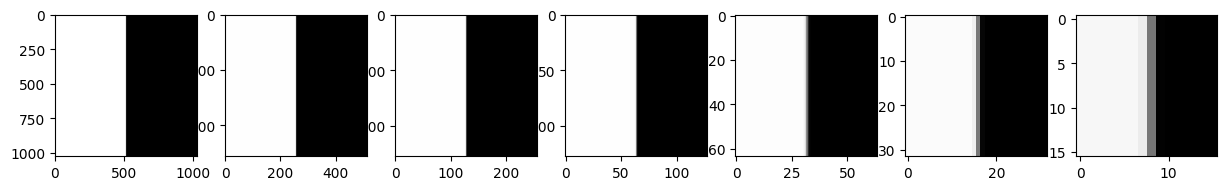

In [53]:
mask = np.zeros_like(orange_img)
mask[:, :512] = 1
gaussian_pyramid_mask = create_gaussian_pyramid(mask)
display_pyramid(gaussian_pyramid_mask)

Now let's look at the Gaussian pyramids of the apple and orange.

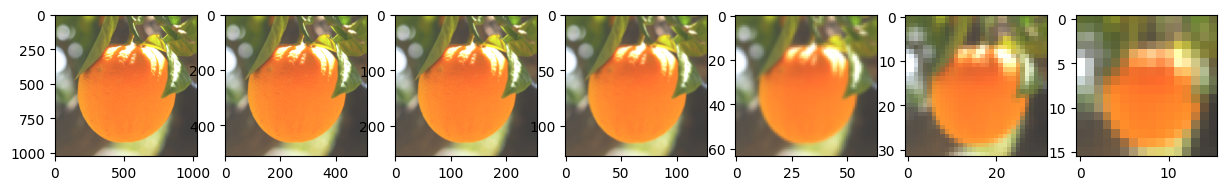

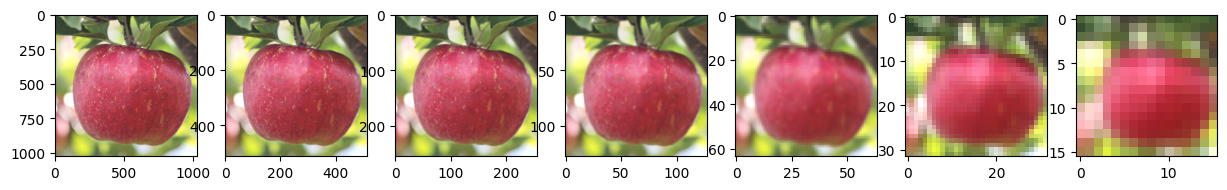

In [54]:
gaussian_pyramid_orange = create_gaussian_pyramid(orange_img)
gaussian_pyramid_apple = create_gaussian_pyramid(apple_img)
display_pyramid(gaussian_pyramid_orange)
# plt.savefig("gaussian_pyramid_orange.png", bbox_inches="tight")
display_pyramid(gaussian_pyramid_apple)
# plt.savefig("gaussian_pyramid_apple.png", bbox_inches="tight")

## Problem 4b
Now let's make the Laplacian pyramid using the Gaussian pyramids you produced in 4a. Your Laplacian pyramid should keep the last Gaussian residual as in [fig 23.8](https://visionbook.mit.edu/pyramids_new_notation.html#fig-blending_pyrs) from the book:

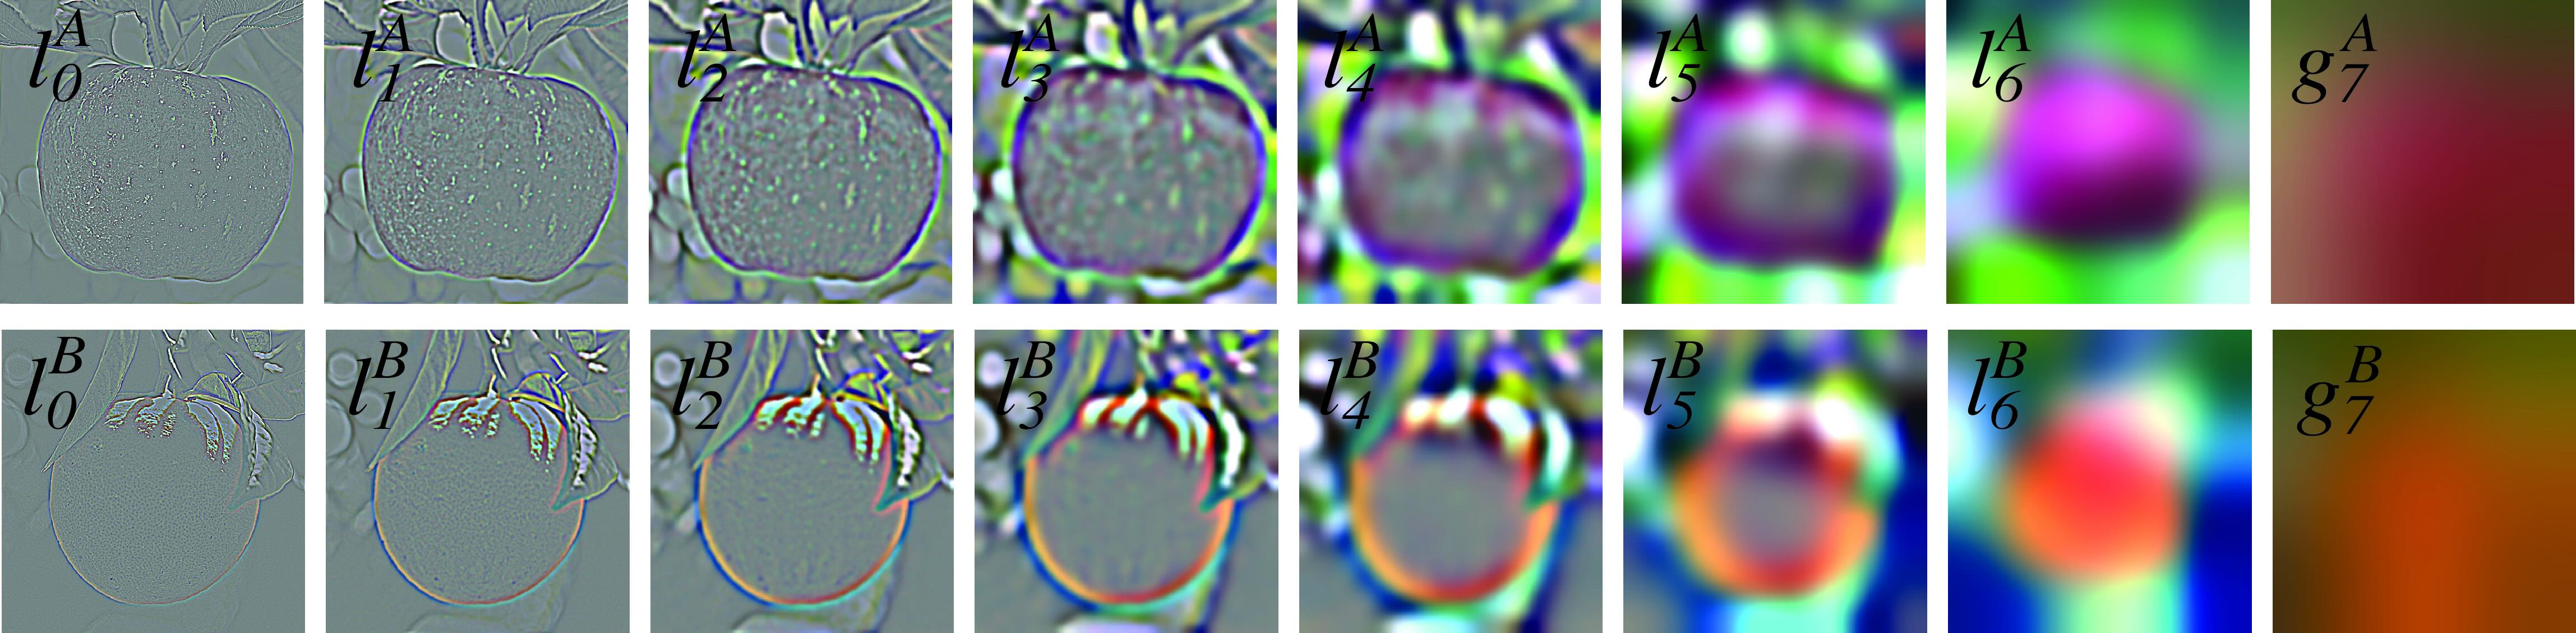



In [57]:


import cv2
import numpy as np

def create_laplacian_pyramid(gaussian_pyramid):

    ### Use the gaussian pyramid to create the laplacian pyramid for the image.
    ### Remember to include the Gaussian residual at the end!
    ### You might find cv2.pyrUp function useful.
    """Creates a Laplacian pyramid from the given Gaussian pyramid."""
    laplacian_all_levels = []

    # loop through every level in the pyramid
    # skip the last level because thats "0"
    for i in range(len(gaussian_pyramid) - 1):
        # upsampling
        gaussian_expanded = cv2.pyrUp(gaussian_pyramid[i + 1])
        # finding the Laplacian by subtracting the upsampled version from the original level
        laplacian = cv2.subtract(gaussian_pyramid[i], gaussian_expanded)
        laplacian_all_levels.append(laplacian)

    # add the remaining picture from the last pyramid level
    laplacian_all_levels.append(gaussian_pyramid[-1])

    return laplacian_all_levels


Let's look at the Laplacian pyramids of our fruits. Keep in mind that your pyramids likely won't look exactly the same as the book example above!

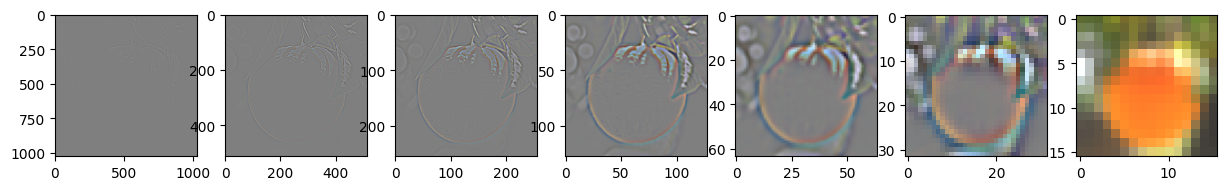

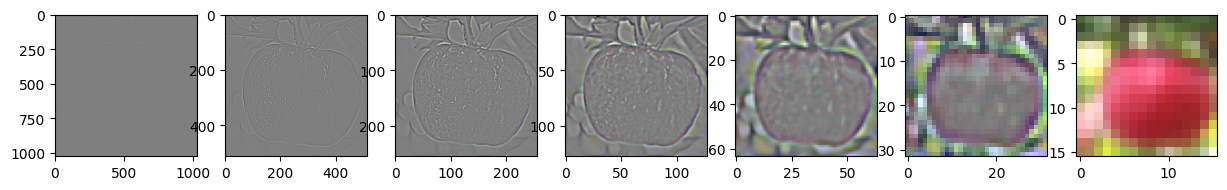

In [58]:
laplacian_pyramid_orange = create_laplacian_pyramid(gaussian_pyramid_orange)
laplacian_pyramid_apple = create_laplacian_pyramid(gaussian_pyramid_apple)
display_pyramid(laplacian_pyramid_orange)
# plt.savefig("laplacian_pyramid_orange.png", bbox_inches="tight")
display_pyramid(laplacian_pyramid_apple)
# plt.savefig("laplacian_pyramid_apple.png", bbox_inches="tight")

## Problem 4c
Now we blend the pyramids! Use the formula

$$\mathbf{l}_k = \mathbf{l}_k^A * \mathbf{m}_k + \mathbf{l}_k^B*(1-\mathbf{m}_k)$$

to calculate the blended Laplacian pyramid.

In [59]:
laplacian_pyramid_blended = []

# loop through the levels of the Laplacian pyramids
for lap_A, lap_B, mask in zip(laplacian_pyramid_apple, laplacian_pyramid_orange, gaussian_pyramid_mask):
    # blending formula given in the question, then append to the list
    blended_level = lap_A * mask + lap_B * (1 - mask)
    laplacian_pyramid_blended.append(blended_level)


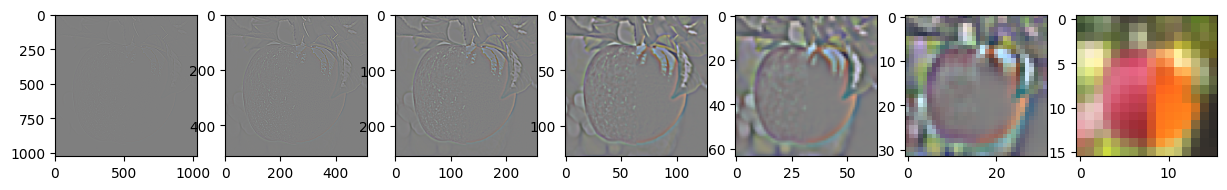

In [60]:
display_pyramid(laplacian_pyramid_blended)

## Problem 4d

The last step is to collapse the Laplacian pyramid to obtain its corresponding blended image.

In [61]:
import cv2
import numpy as np

def collapse_laplacian_pyramid(laplacian_pyramid):
    ### TODO: ENTER YOUR CODE BELOW
    ### Collapse the Laplacian pyramid to find the original image.
    ### You might find cv2.pyrUp function useful.
    """Reconstructs the image by collapsing the Laplacian pyramid."""
    # start with the last level because that is the most defined
    blended_image = laplacian_pyramid[-1]

    # iterate through the rest of the levels
    for i in range(len(laplacian_pyramid) - 2, -1, -1):
        # Upsample
        blended_image = cv2.pyrUp(blended_image, dstsize=(laplacian_pyramid[i].shape[1], laplacian_pyramid[i].shape[0]))
        # add laplacian details
        blended_image = cv2.add(blended_image, laplacian_pyramid[i])

    return blended_image


In [62]:
blended_img = collapse_laplacian_pyramid(laplacian_pyramid_blended)

Let's see what our final blended image looks like!

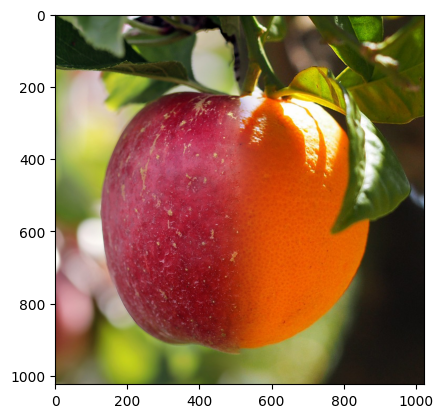

In [63]:
imshow(blended_img)

# Problem 5: Eulerian Motion Magnification (Optional)

Let's start by reading all the frames of the video.

In [ ]:
import numpy as np
import cv2
import scipy.signal as signal
import scipy.fftpack as fftpack
import matplotlib.pyplot as plt

! curl http://people.csail.mit.edu/mrub/evm/video/baby.mp4 > baby.mp4

cap = cv2.VideoCapture('baby.mp4')
fps = int(cap.get(cv2.CAP_PROP_FPS))

# list of video frames
frames = []

while(cap.isOpened()):
    # read frame from the video
    ret, frame = cap.read()

    if ret is False:
        break
    frame = cv2.resize(frame, (424, 240))
    frame = frame[:, 80:80+240]
    frames.append(frame)

cap.release()

# scale frame to 0-1
frames = np.array(frames) / 255.
print("frames size:", frames.shape, "# (nb_frames, height, width, channel)")

# get height, width
numFrames = frames.shape[0]
height = frames.shape[1]
width = frames.shape[2]

# Helper function for displaying the pyramid
def display_pyramid(pyramid):
  N = len(pyramid)
  for lvl in range(len(pyramid)):
    plt.subplot(1, N, lvl+1)
    imshow(intensityscale(pyramid[lvl][0, ..., ::-1]))


# Problem 5a: Gaussian pyramid
We will first write a function to create a gaussian pyramid of the input frames. The function takes in an array of N frames (N, H, W, 3) and outputs a list of frames (num_levels, N, H, W, 3) such that each entry corresponds to the gaussian pyramid starting from the finest to the coarest level.



In [ ]:
def create_gaussian_pyramid(vid, num_levels=4):

  ### TODO: ENTER YOUR CODE BELOW
  ### return a list with the gaussian pyramid of the video.
  ### consider using the cv2.pyrDown function to create each level of the pyramid.

  return [] # returning empty list for now. Change this!

In [ ]:
gaussian_pyramid = create_gaussian_pyramid(frames)

In [ ]:
display_pyramid(gaussian_pyramid)
plt.savefig("gaussian_pyramid.png", bbox_inches="tight")

# Problem 5b: Laplacian pyramid
Now let's make the Laplacian pyramid using the gaussian pyramids you produced in 4a. Check that the returned frames take the form of (num_levels - 1, N, H, W, 3) [*sanity check: why?*]


In [ ]:
def create_laplacian_pyramid(gaussian_pyramid):
  ### TODO: ENTER YOUR CODE BELOW
  ### use the gaussian pyramid to create the laplacian pyramid for the video.
  ### You might find cv2.pyrUp function useful.

  return [] # returning empty list for now. Change this!

In [ ]:
laplacian_pyramid = create_laplacian_pyramid(gaussian_pyramid)

In [ ]:
display_pyramid(laplacian_pyramid)
plt.savefig("laplacian_pyramid.png", bbox_inches="tight")

# Problem 5c: Butter bandpass filter temporally

In [ ]:
def butter_bandpass_filter(laplace_video, low_freq, high_freq, fs, filter_order=5):
    omega = 0.5 * fs
    low = low_freq / omega
    high = high_freq / omega

    # create a "bandpass" signal filter using the signal.butter function
    b, a = # TODO


    # filter the laplcian of the video using the signal.lfilter
    y = # TODO

    return y

amplification = 20
low = 0.4
high = 3.

bandpass_filtered = []
for i in range(len(laplacian_pyramid)):
    # Applying the butter_bandpass_filter to each of
    # the levels of the laplacian pyramid

    filter = butter_bandpass_filter(laplacian_pyramid[i], low, high, fps)
    filter *= amplification
    bandpass_filtered.append(filter)

# Problem 5d: Combining the amplified filtered signal to get the magnified video

In [ ]:
### TODO: ENTER YOUR CODE BELOW
### Combine all the bandpassed filtered signals to one matrix which is the same
### dimensions as the input video.
### Hint: start from the lowest resolution of the amplified filtered signal,
### upsample that using cv2.pyrUp and add it to the amplified filtered signal
### at the next higher resolution.

### The output video, 'euler_magnified_video', will be the
### input video frames + combined magnified signal.


In [ ]:
### Note:
### The output video will likely flicker and show severe magnification artifacts
### for about 4 seconds before showing a noisy magnified video.
### The initial artifacts should be ignored.

# create output video
fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
# fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('baby_euler_magnification.avi', fourcc, 30.0, (height, width))

for i in range(frames.shape[0]):
    # scale the frame back to 0-255
    frame = (np.clip(euler_magnified_video[i], 0, 1) * 255).astype(np.uint8)

    # write frame to output video
    out.write(frame)

out.release()